In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_train_img,y_train_label),\
(x_test_img,y_test_label) = cifar10.load_data()

In [3]:
##查看資料
print("train:",len(x_train_img))
x_train_img.shape


train: 50000


(50000, 32, 32, 3)

In [4]:
##建立y_label dict
label_dict={0:'airplane',1:'autompbile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

In [5]:
import matplotlib.pyplot as plt
def plot_images_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25: num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,i+1)
        ax.imshow(images[idx],cmap='binary')
            
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
        ax.set_title(title,fontsize = 10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

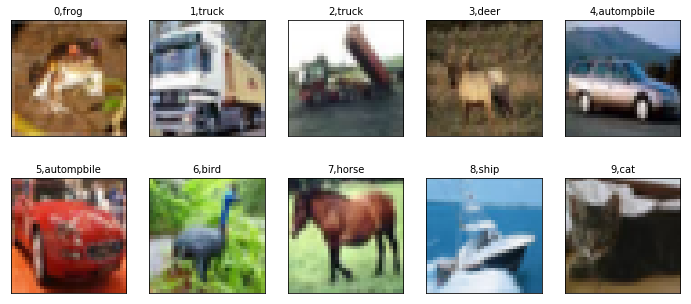

In [6]:
plot_images_prediction(x_train_img,y_train_label,[],0)

In [7]:
##資料預處理
x_train_img[0][0][0]


array([59, 62, 63], dtype=uint8)

In [8]:
#將影像數字標準化
x_train_img_normalize = x_train_img.astype('float32') / 255.0 
x_test_img_normalize = x_test_img.astype('float32') / 255.0 

In [9]:
y_train_label[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
##label標籤欄位轉為OneHot encoding
from keras.utils import np_utils
y_train_label_OneHot = np_utils.to_categorical(y_train_label)
y_test_label_OneHot = np_utils.to_categorical(y_test_label)

In [11]:
##前五筆圖的label OneHot量化
y_train_label_OneHot[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [12]:
##匯入模型
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D

In [13]:
#建立Sequential模型
model=Sequential()

In [14]:
#建立卷積層1
model.add(Conv2D(filters = 32,
                 kernel_size=(3,3),
                 input_shape = (32,32,3),
                 activation = 'relu',
                 padding = 'same'))

In [15]:
##避免overfitting
model.add(Dropout(rate=0.25))

In [16]:
#建立池化層1
model.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
#建立卷積層2
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation = 'relu',
                 padding = 'same'))

In [18]:
model.add(Dropout(rate=0.25))

In [19]:
##池化層2
model.add(MaxPooling2D(pool_size=(2,2)))

In [20]:
#建立平坦層
model.add(Flatten())
#隨機拋棄25%神經元
model.add(Dropout(rate=0.25))

In [21]:
##建立隱藏層
model.add(Dense(1024,
                activation = 'relu'))
model.add(Dropout(rate=0.25))

In [22]:
#建立輸出層 將輸出轉換成每一個預測影像類別的機率
model.add(Dense(10,
                activation = 'softmax'))

In [23]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [25]:
##定義訓練方式
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
##開始訓練
train_history = model.fit(x_train_img_normalize,y_train_label_OneHot,
                          validation_split = 0.2,
                          epochs = 10,
                          batch_size = 128,
                          verbose = 1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 80s - loss: 1.5048 - acc: 0.4567 - val_loss: 1.2883 - val_acc: 0.5750
Epoch 2/10
35200/40000 [=========================>....] - ETA: 9s - loss: 1.1531 - acc: 0.5898